<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/Prueba2_Valentin_Gracia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba Track 3, intento **1**

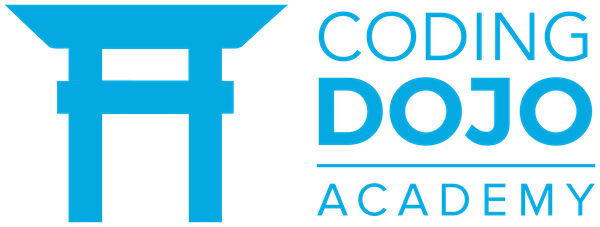



###Alumno :  Valentin Gracia


###Data Science G1 2021, Coding Dojo

#1 Librerias y complementos

In [ ]:
#por unica vez instalamos pivot table js, para hacer unas tablitas
#por unica vez instalamos LazyClassifier, para tener un feeling (no concluyente) de los modelos
#no olvidar reiniciar runtime
 
#!pip install pivottablejs
#!pip install lazypredict

In [ ]:
#Librerias Clasicas

#Basicos
import pandas as pd
import numpy as np

#Chart
import matplotlib.pyplot as plt
import seaborn as sb

#Preprocesso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Reporte
from sklearn.metrics import classification_report
import missingno as mssno
#from pivottablejs import pivot_ui
from IPython.display import HTML

from lazypredict.Supervised import LazyClassifier


#Optimizador hiperparametro
from sklearn.model_selection import GridSearchCV

#Modelos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#prueba3
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import NearestCentroid

#Redes Neuronales keras-tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


from sklearn.cluster import KMeans

#DataDefault
#from sklearn.datasets import load_iris


#Widgets
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider
import ipywidgets as widgets

#other
from termcolor import colored
from google.colab import output
import warnings

#apagamos los warnings, antes de generar el entregable o mejor no.
warnings.filterwarnings('ignore')




In [ ]:
creditCards_df=pd.read_csv("/content/drive/MyDrive/Coding Dojo/creditCards/creditcard.csv")
creditCards_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


#2 Analisis Exploratorio

##2.1 Informacion y resumenes

In [ ]:
creditCards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
creditCards_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


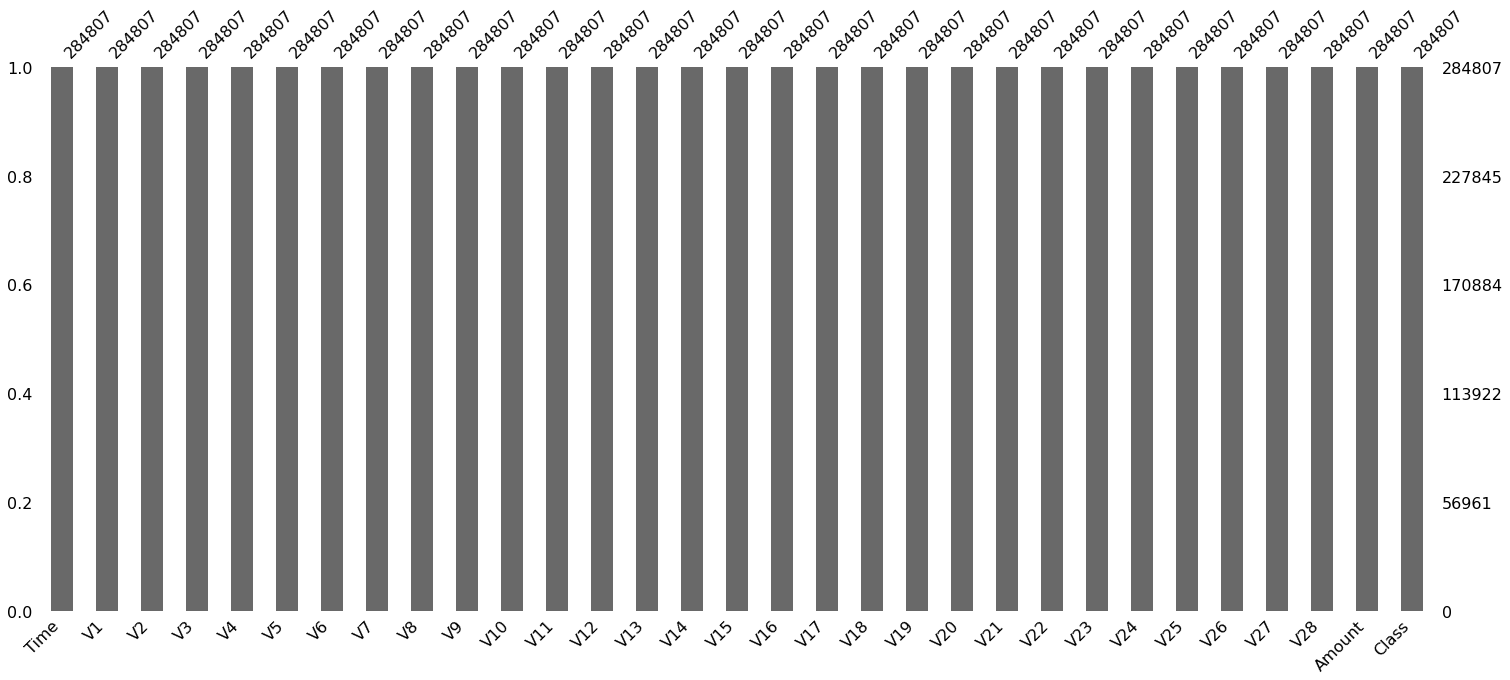

In [ ]:
mssno.bar(creditCards_df);

In [ ]:
#tablita exploratoria
#pivot_ui(creditCards_df, outfile_path='pivottablejs.html')
#HTML('pivottablejs.html')


##2.2 Visualizaciones

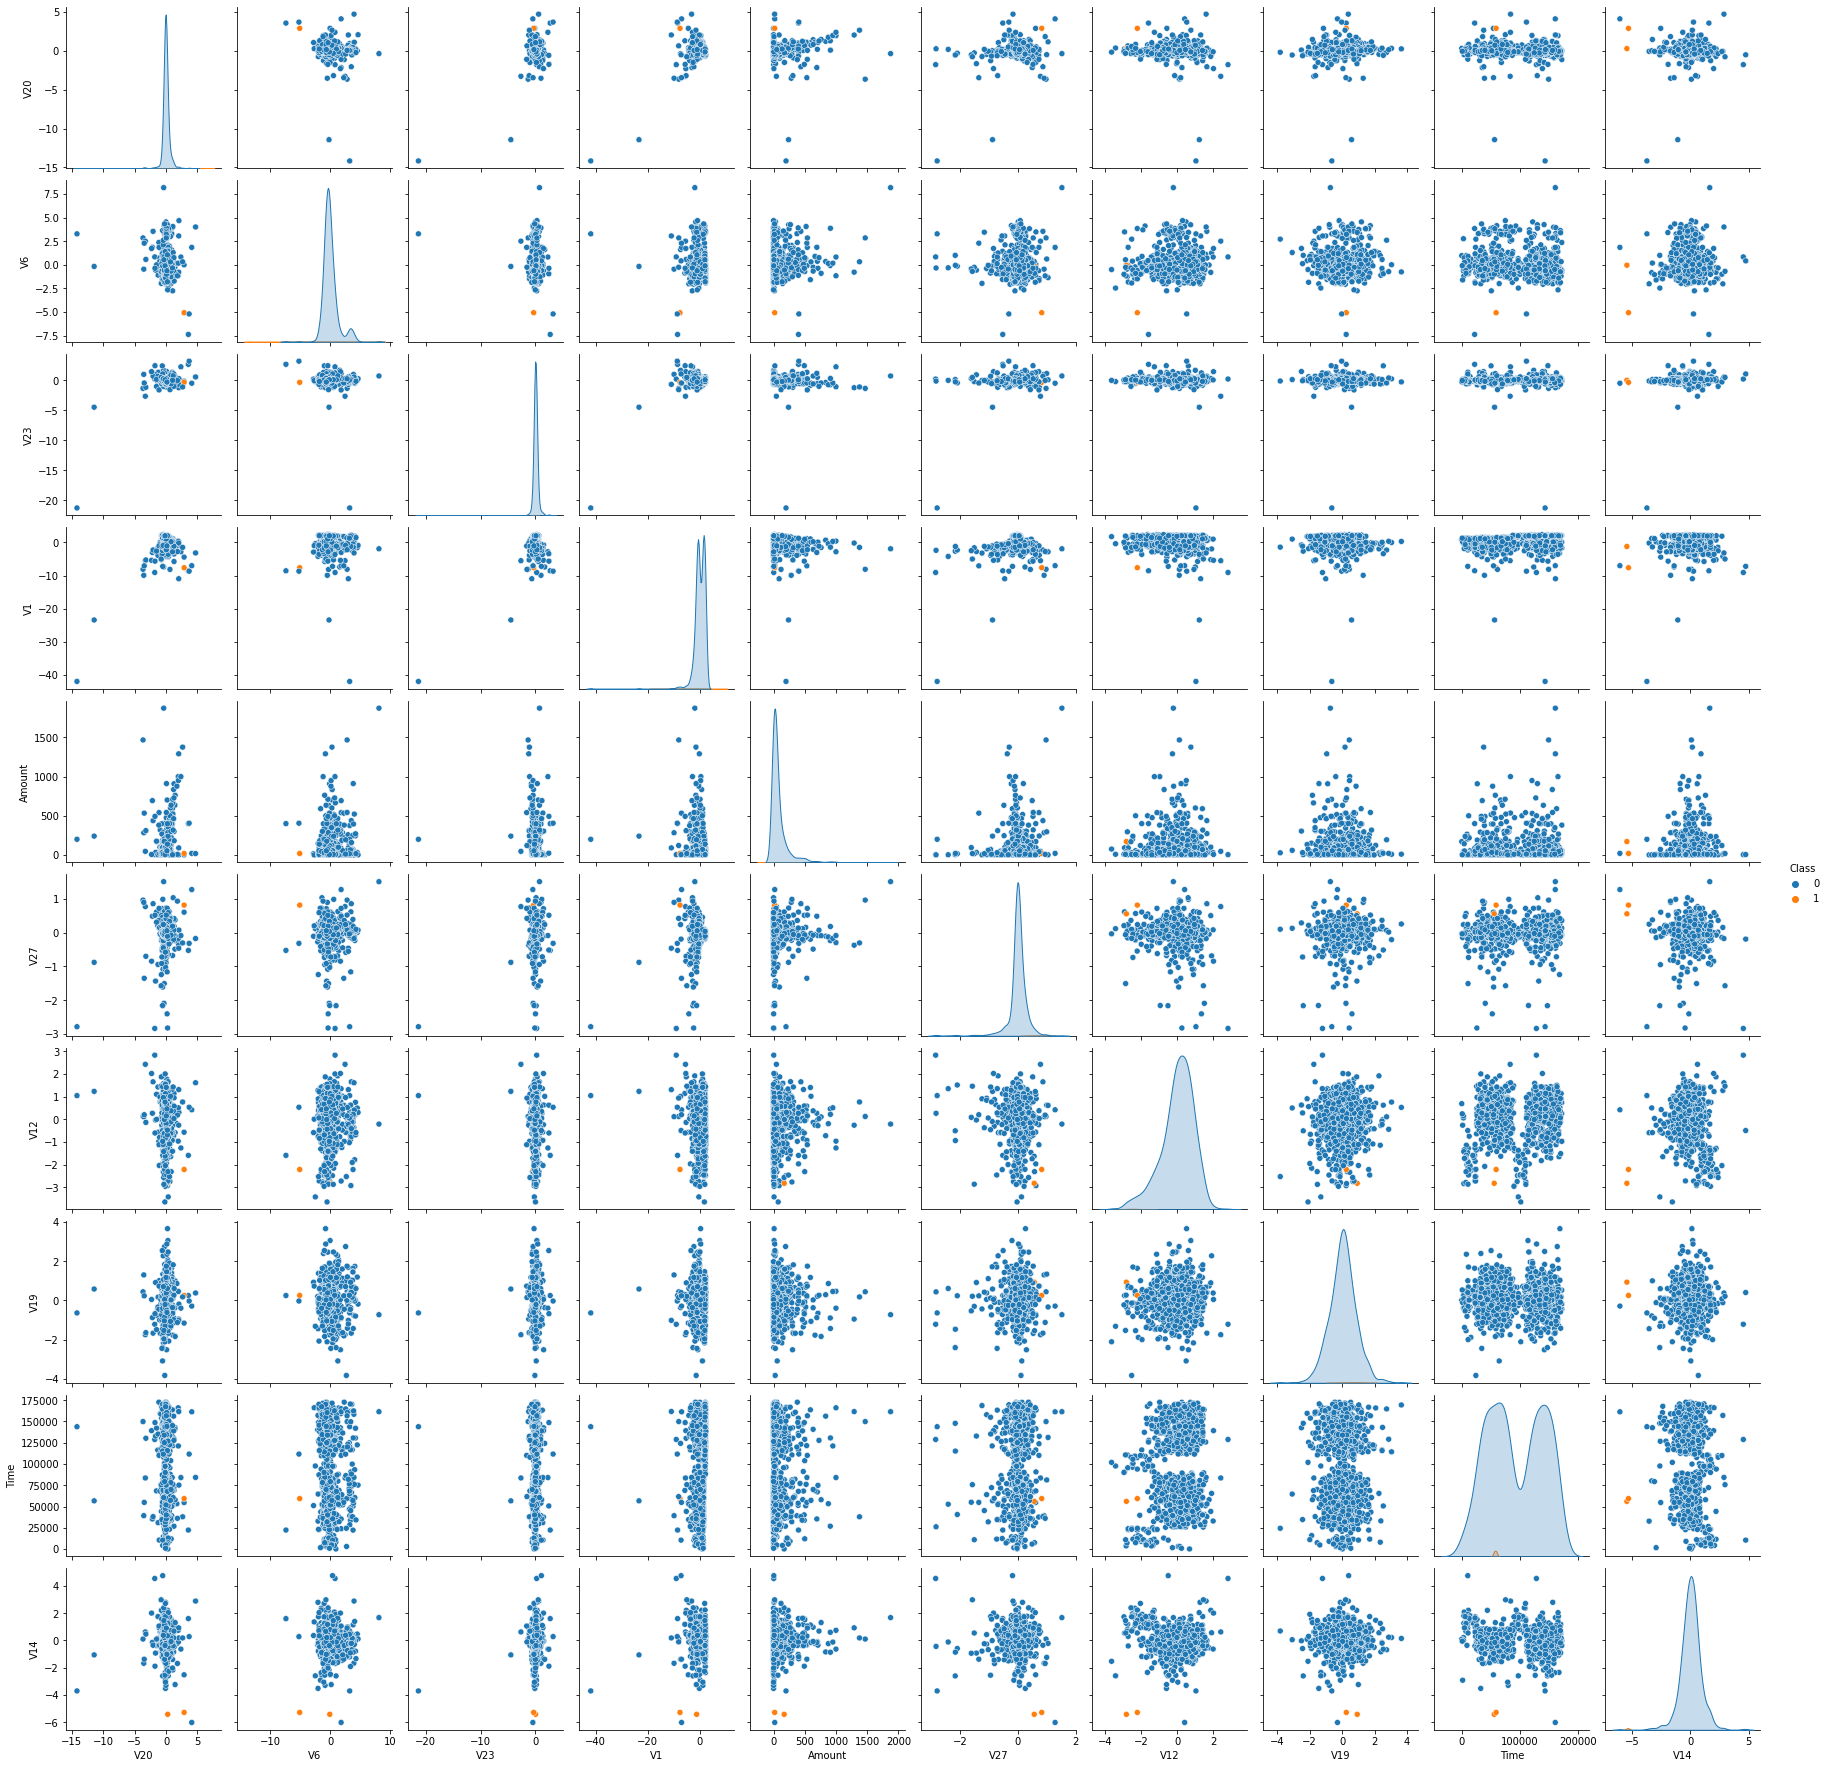

In [ ]:
#Histogramas variables numericas
creditCards_df_sample= creditCards_df.sample(10 , axis=1)

creditCards_df_sample["Class"]=creditCards_df["Class"]


creditCards_df_sample= creditCards_df_sample.sample(1000 , axis=0)


sb.pairplot(creditCards_df_sample,hue="Class")

##2.3 Enmiendas al dataset

In [ ]:
#Todas las columnas fueron casteadas como float, lo que nos asegura la ausencia de valores NaN ni alfanumericos.

creditCards_df.dropna()

creditCards_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#2.4 Sumario Dataset,

este dataset no presenta grandes problemas por enmendar.

# 3 Reduccion de dimensionalidad


Reduccion de dimensionalidad, en la consigna del problema se nos indica que el dataset ya viene procesado por PCA, aun cuando la plataforma menciona que si podemos usar PCA + LDA juntos, ocurre que el maximo numero de componentes que puede rendir LDA es n_componentes=n_classes-1, es decir solo una columna. Por lo tanto se descartan futuras reducciones de dimensionalidad.







#4 Modelación

Pensando en un entorno real donde los datos de tarjetas entran a los sistemas en tiempo real, o en enormes Backlogs, los ejes que priorizaremos en la construccion de modelos, debido a la naturaleza del dataset (desbalance en las 2 clases, fraude no fraude) seran :

1) Velocidad de proceso (el dataset crecera en tiempo real o en grandes volumenes, es imporante que el modelo resuelva lo mas rapido posible)

2) Maximizacion de la captura de True Positive para la clase Fraude.

3) Evitar el sobreentrenamiento.



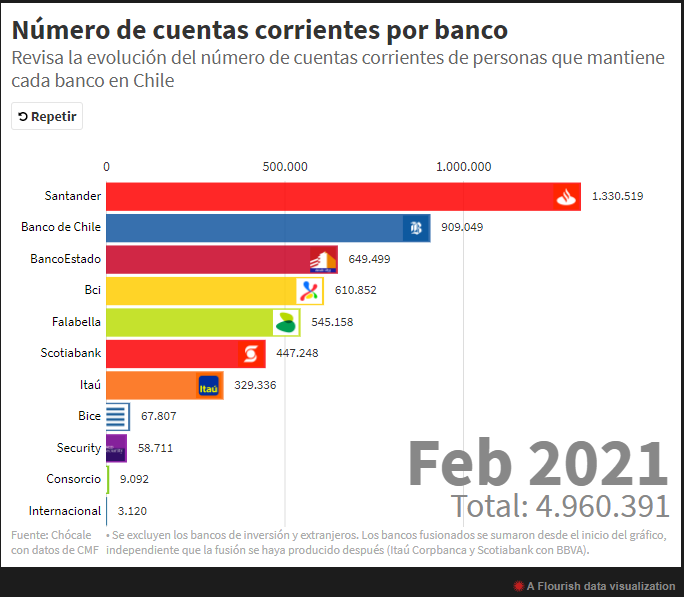


## 4.1 Separacion de Muestras y Escalado.


Por el gran numero de registros, tomamos solo muestra del dataset para la construccion de modelos, al ser la clase fraude muy minoritaria, tanto train como test,  serán del mismo tamaño.

In [ ]:
#muestreamos al 75% 25% por default  y semilla "1"
X=creditCards_df.drop(columns=["Class"])
y=creditCards_df["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=8000,train_size=8000,random_state=1)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")


X_train (8000, 30)
X_test (8000, 30)


In [ ]:
#Escalado
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

no puse Pipeline, creo que aunque el cuaderno quede mas verboso, por claridad del cliente o la persona que releve la actividad, es mejor que se puedan indentificar los pasos facilmente.

##4.2 Lazy Classifier, de una lectura de medium de esta semana

https://towardsdatascience.com/lazy-predict-fit-and-evaluate-all-the-models-from-scikit-learn-with-a-single-line-of-code-7fe510c7281

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:25<00:00,  1.12it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,0.87,0.87,1.00,2.02
LinearDiscriminantAnalysis,1.00,0.87,0.87,1.00,0.12
PassiveAggressiveClassifier,1.00,0.87,0.87,1.00,0.07
NearestCentroid,1.00,0.87,0.87,1.00,0.06
LinearSVC,1.00,0.87,0.87,1.00,0.12
SGDClassifier,1.00,0.87,0.87,1.00,0.09
LogisticRegression,1.00,0.87,0.87,1.00,0.16
GaussianNB,0.98,0.87,0.87,0.99,0.04
ExtraTreesClassifier,1.00,0.83,0.83,1.00,0.40


Revisaremos 3 Modelos interesantes por su velocidad en resolucion y por su balanced accuracy el 
-Gaussian Naive Bayes
-NearestCentroid
-LogisticRegression

por criterios de tiempo de calculo y balanced_acurracy, especial para clases desbalanceadas (87%)

#4.3.1 modelo 1 Gaussian Naive Bayes

In [ ]:
#Inicializamos modelo Vainilla
creditCards_GNB = GaussianNB() 
creditCards_GNB.fit(X_train, y_train)
creditCards_GNB.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#score R2 de Entrenamiento
creditCards_GNB.score(X_train,y_train)

0.980625

In [ ]:
#score R2 de test
#arrayR2.append({"GNB Vanilla":creditCards_GNB.score(X_test,y_test)})
creditCards_GNB.score(X_test,y_test)


0.980625

In [ ]:
#miraremos un poco mas el desempenho del modelo
target_names = ["O","F"]

y_pred=creditCards_GNB.predict(X_test)

print(classification_report(y_test,y_pred,target_names=target_names))



              precision    recall  f1-score   support

           O       1.00      0.98      0.99      7988
           F       0.06      0.75      0.10        12

    accuracy                           0.98      8000
   macro avg       0.53      0.87      0.55      8000
weighted avg       1.00      0.98      0.99      8000



In [ ]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

en este paso omitiremos la optimizacion, no vale la pena pues la Precición de las clases "F" es muy baja 6% asi que este es un mal algoritmo, lástima.

#4.3.2 Nearest centroid

In [ ]:
#Inicializamos modelo Vainilla
creditCards_NC = NearestCentroid()
creditCards_NC.fit(X_train, y_train)
creditCards_NC.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#score R2 de Entrenamiento
creditCards_NC.score(X_train,y_train)

0.9995

In [ ]:
#score R2 de Entrenamiento
creditCards_NC.score(X_test,y_test)

0.999

In [ ]:
#miraremos un poco mas el desempenho del modelo

target_names = ["O","F"]

y_pred=creditCards_NC.predict(X_test)

print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           O       1.00      1.00      1.00      7988
           F       0.64      0.75      0.69        12

    accuracy                           1.00      8000
   macro avg       0.82      0.87      0.85      8000
weighted avg       1.00      1.00      1.00      8000



metrica precision para clase Fraude en 64%, bastante bueno.

In [ ]:
param_grid = [{"metric": ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]}]

opt_creditCards_NC = GridSearchCV(estimator =NearestCentroid(), param_grid = param_grid, scoring = 'recall', cv=10) 

opt_creditCards_NC.fit(X_train, y_train)

# [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]

GridSearchCV(cv=10, estimator=NearestCentroid(),
             param_grid=[{'metric': ['cityblock', 'cosine', 'euclidean', 'l1',
                                     'l2', 'manhattan']}],
             scoring='recall')

In [ ]:
print("Mejor score (sensibilidad-recall): ", opt_creditCards_NC.best_score_)
print("Mejores hiperparámetros: ", opt_creditCards_NC.best_params_)
print("Mejor modelo: ",opt_creditCards_NC.best_estimator_)

Mejor score (sensibilidad-recall):  1.0
Mejores hiperparámetros:  {'metric': 'cosine'}
Mejor modelo:  NearestCentroid(metric='cosine')


In [ ]:
opt_creditCards_NC=opt_creditCards_NC.best_estimator_
opt_creditCards_NC.fit(X_train,y_train)

NearestCentroid(metric='cosine')

In [ ]:
#miraremos un poco mas el desempenho del modelo

target_names = ["O","F"]

y_pred=opt_creditCards_NC.predict(X_test)

print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           O       1.00      0.58      0.74      7988
           F       0.00      0.92      0.01        12

    accuracy                           0.58      8000
   macro avg       0.50      0.75      0.37      8000
weighted avg       1.00      0.58      0.74      8000



Mega Pesimo no reconoce a ningun Fraude 0%

#4.3.3 LogisticRegression

In [ ]:
#Inicializamos modelo Vainilla
creditCards_logReg = LogisticRegression() 
creditCards_logReg.fit(X_train, y_train)
creditCards_logReg.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#miraremos un poco mas el desempenho del modelo

target_names = ["O","F"]

y_pred=creditCards_logReg.predict(X_test)

print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           O       1.00      1.00      1.00      7988
           F       0.53      0.75      0.62        12

    accuracy                           1.00      8000
   macro avg       0.76      0.87      0.81      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
param_grid = [{'C': [0.1,0.2,0.5,0.7,1], 'penalty': ["l1","l2","elasticnet"], 'solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}]

opt_creditCards_logReg = GridSearchCV(estimator =LogisticRegression() , param_grid = param_grid, scoring = 'recall', cv=10) 

opt_creditCards_logReg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.2, 0.5, 0.7, 1],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='recall')

In [ ]:
print("Mejor score (sensibilidad-recall): ", opt_creditCards_logReg.best_score_)
print("Mejores hiperparámetros: ", opt_creditCards_logReg.best_params_)
print("Mejor modelo: ",opt_creditCards_logReg.best_estimator_)

Mejor score (sensibilidad-recall):  0.85
Mejores hiperparámetros:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor modelo:  LogisticRegression(C=1, penalty='l1', solver='liblinear')


In [ ]:
opt_creditCards_logReg=opt_creditCards_logReg.best_estimator_
opt_creditCards_logReg.fit(X_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
#miraremos un poco mas el desempenho del modelo

target_names = ["O","F"]

y_pred=opt_creditCards_logReg.predict(X_test)

print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           O       1.00      1.00      1.00      7988
           F       0.60      0.75      0.67        12

    accuracy                           1.00      8000
   macro avg       0.80      0.87      0.83      8000
weighted avg       1.00      1.00      1.00      8000



#5 Conclusion

La recomendacion es Nearest Centroids vainilla, el cual es un algoritmo simple, pero altamente poderoso y arrojo una precision para las clases F, de un 64%

 seguido por la regresion Logistica optimizada que alcanzo precision para clases F de un 60%.


Es decir capturaremos el 64% del Fraude de un gran numero de trx digeridas por un modelo rapido.

Muchas gracias Profe Alberto.